In [1]:
import src as typy
from joblib import Parallel, delayed
from multiprocessing import cpu_count
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.ndimage import gaussian_filter1d
import pandas as pd

In [2]:
plt.style.use('seaborn-v0_8-bright')
from cycler import cycler
color=['blue','green','red','orange','cyan','darkviolet','brown','deeppink','lime']
default_cycler = (cycler(color=color))
plt.rc('axes', prop_cycle=default_cycler)

In [3]:
outdir= "./Results"
sigmas = os.listdir(outdir)

In [4]:
data = typy.reads.read_epc(path=f"{outdir}/{sigmas[0]}")

In [5]:
meta,e_k,e_kq,ph,g_kq = data
model = typy.epc.model(e_k,e_kq,ph=np.zeros(shape=(meta.nph,meta.nq)),g=g_kq)

In [6]:
nph = meta['nph']
nq = meta['nq']
sym = meta['sym']
sym_label = meta['sym_label']

In [7]:
abs = (g_kq*g_kq.conj()).real

In [8]:
selfen_matrix  = model.calculate('selfen_matrix')
selfen = -np.rollaxis(np.array(selfen_matrix),0,3)

In [9]:
suscep  = model.calculate('susceptibility')


In [10]:
suscep_ev = -(np.array(suscep).real.astype(np.float32))*10**-3

In [11]:
mean = abs.mean(axis=2)

In [12]:
ph[0].max()

12.24939458

In [13]:
from matplotlib.colors import LinearSegmentedColormap


In [14]:
cmap = LinearSegmentedColormap.from_list('cmap_custom', color, N=9)

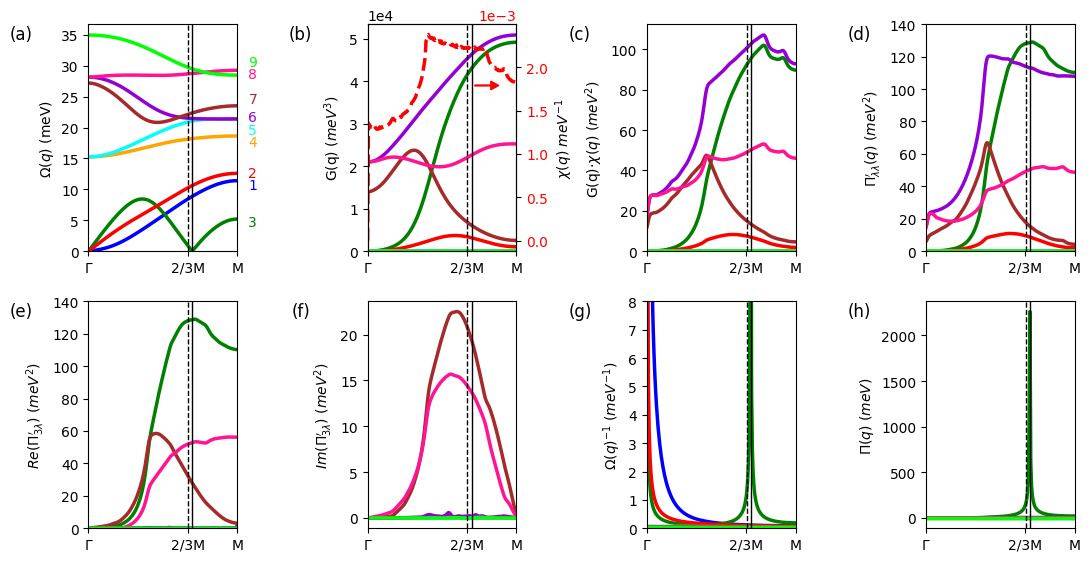

In [18]:
color=['blue','green','red','orange','cyan','darkviolet','brown','deeppink','lime']

fig, axs = plt.subplots(2, 4,figsize=(12,7))
fig.tight_layout(pad=6,h_pad=1.5)


for i in range(nph):
    axs[0][0].plot(ph[i],label=i,linewidth=2.5,color=color[i])
text_dist = 200
axs[0][0].text(text_dist,4,"3",c='green')
axs[0][0].text(text_dist,10,"1",c='blue')
axs[0][0].text(text_dist,12,"2",c='red')
axs[0][0].text(text_dist,17,"4",c='orange')
axs[0][0].text(text_dist,19,"5",c='cyan')
axs[0][0].text(text_dist,21,"6",c='darkviolet')
axs[0][0].text(text_dist,24,"7",c='brown')
axs[0][0].text(text_dist,28,"8",c='deeppink')
axs[0][0].text(text_dist,30,"9",c='lime')
axs[0][0].set_xlim(0,sym[1])
axs[0][0].set_ylim(0)
axs[0][0].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[0][0].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[0][0].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[0][0].set_ylabel(r"$\Omega(q)$ (meV)")
axs[0][0].set_title('(a)', x=-0.45,y=0.9)
axs[0][0].set_title('(a)', x=-0.45,y=0.9)


axt = axs[0][1].twinx()
axt.set_ylabel(r"$\chi(q)$ $meV^{-1}$")
axt.tick_params(axis='y', labelcolor='r')
axt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axt.plot(suscep_ev,c='r',linewidth=2.5,linestyle="--")

for i in range(nph):
    axs[0][1].plot(mean[i].real,linewidth=2.5,c=color[i])
axs[0][1].set_xlim(0,sym[1])
axs[0][1].set_ylim(0)
axs[0][1].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[0][1].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[0][1].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[0][1].set_ylabel(r"G(q) (${meV}^{3}$)")
axs[0][1].set_title('(b)', x=-0.45,y=0.9)
axs[0][1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0][1].arrow(sym[1]*2/3+10, 3.9*10**4, 20, 0, width = 0.02* 10**4,head_length=10,head_width =0.2* 10**4,color='red')




for i in range(nph):
    axs[0][2].plot(gaussian_filter1d((mean[i].real)*suscep_ev,2),linewidth=2.5,c=color[i])
# plt.title(r"$G = \sum g_0\cdot g^{\star}_0$")
    # plt.plot(g_abs_mean[i]/g_abs_mean.max(),c='blue')

axs[0][2].set_ylabel(r"G(q)$\cdot\chi(q)$ (${meV}^{2}$)")
axs[0][2].set_xlim(0,sym[1])
axs[0][2].set_ylim(0)
axs[0][2].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[0][2].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[0][2].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[0][2].set_title('(c)', x=-0.45,y=0.9)




for i in range(nph):
    axs[0][3].plot(gaussian_filter1d(selfen[i][i].real.astype(np.float32),2),linewidth=2.5)
axs[0][3].set_ylabel(r"$\Pi^{\prime}_{\lambda\lambda}(q)$ (${meV}^{2}$)")
# # axs[1][0].set_title(r"$\Pi^{\prime}_{\lambda\lambda^{\prime}}$")
axs[0][3].set_xlim(0,sym[1])
axs[0][3].set_ylim(0,140)
axs[0][3].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[0][3].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[0][3].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[0][3].set_title('(d)', x=-0.45,y=0.9)


for i in range(nph):
    axs[1][0].plot(gaussian_filter1d(np.abs(selfen[1][i].real),2),linewidth=2.5)
axs[1][0].set_xlim(0,sym[1])
axs[1][0].set_ylim(0,140)
axs[1][0].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[1][0].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[1][0].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[1][0].set_title('(e)', x=-0.45,y=0.9)
axs[1][0].set_ylabel(r"$Re(\Pi^{\prime}_{3\lambda})$ (${meV}^{2}$)")

for i in range(nph):
    axs[1][1].plot(gaussian_filter1d(np.abs(selfen[1][i].imag),2),linewidth=2.5)
axs[1][1].set_xlim(0,sym[1])
# axs[1][1].set_ylim(0,30)
axs[1][1].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[1][1].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[1][1].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[1][1].set_ylabel(r"$Im(\Pi^{\prime}_{3\lambda})$ (${meV}^{2}$)")
axs[1][1].set_title('(f)', x=-0.45,y=0.9)



for i in range(nph):
    axs[1][2].plot(1/ph[i],linewidth=2.5,c=color[i])
axs[1][2].set_xlim(0,sym[1])
axs[1][2].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[1][2].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[1][2].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[1][2].set_ylim(0,8)
axs[1][2].set_ylabel(r"$\Omega(q)^{-1}$ (${meV}^{-1}$)")
axs[1][2].set_title('(g)', x=-0.45,y=0.9)



for i in range(nph):
    axs[1][3].plot(selfen[i][i].real/ph[i],linewidth=2.5)
axs[1][3].set_xlim(0,sym[1])
axs[1][3].set_xticks([sym[0],sym[1]*2/3,sym[1]],[r"$\Gamma$","2/3M","M"])
axs[1][3].axvline((sym[1]+1)*2/3,c='black',lw=1,linestyle='--')
axs[1][3].axvline(np.argmin(ph[1][100:200])+100,c='black',lw=1)
axs[1][3].set_ylabel(r"$\Pi(q)$ $({meV})$")
axs[1][3].set_title('(h)', x=-0.45,y=0.9)



    # plt.plot(abs(selfen_matrix[0][i].real),label=i)
# plt.title(r"$1/\Omega$")
plt.savefig("./full_figure.pdf",bbox_inches='tight')
plt.show()